Natural Language Processing is a part of computer science that allows computers to understand language naturally, as a person does. This means the laptop will comprehend sentiments, speech, answer questions, text summarization, etc.

# Step1 Data Cleaning

In [1]:
import pandas as pd 
text = ["This is the NLP TASKS ARTICLE written by ABhishek Jaiswal** ","IN this article I'll be explaining various DATA-CLEANING techniques",
 "So stay tuned for FURther More &&","Nah I don't think he goes to usf, he lives around"]
df = pd.DataFrame({'text':text})

In [2]:
df

,text
0,This is the NLP TASKS ARTICLE written by ABhis...
1,IN this article I'll be explaining various DAT...
2,So stay tuned for FURther More &&
3,"Nah I don't think he goes to usf, he lives around"


Lowercasing


In [3]:
df['lower'] = df['text'].apply(lambda x: " ".join(x.lower()  for x in x.split()))
df

,text,lower
0,This is the NLP TASKS ARTICLE written by ABhis...,this is the nlp tasks article written by abhis...
1,IN this article I'll be explaining various DAT...,in this article i'll be explaining various dat...
2,So stay tuned for FURther More &&,so stay tuned for further more &&
3,"Nah I don't think he goes to usf, he lives around","nah i don't think he goes to usf, he lives around"


Punctuation Removal: 
Removing punctuation(*,&,%#@#()) is a crucial step since punctuation doesn’t add any extra information or value to our data. Hence, removing punctuation reduces the data size; therefore, it improves computational efficiency.

In [4]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
import re
df.text.apply(lambda x:''.join(re.findall(r'[a-zA-Z+" "]', x)))

0    This is the NLP TASKS ARTICLE written by ABhis...
1    IN this article Ill be explaining various DATA...
2                      So stay tuned for FURther More 
3      Nah I dont think he goes to usf he lives around
Name: text, dtype: object

Stop Words Removal:
Words that frequently occur in sentences and carry no significant meaning in sentences.

In [6]:
import nltk 
nltk.download('stopwords') 
from nltk.corpus import stopwords
allstopwords = stopwords.words('english')
df.lower.apply(lambda x: " ".join(i for i in x.split() if i not in allstopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HTW1KOR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0         nlp tasks article written abhishek jaiswal**
1    article i'll explaining various data-cleaning ...
2                                        stay tuned &&
3                     nah think goes usf, lives around
Name: lower, dtype: object

Spelling Correction:
Most of the text data extracted in customer reviews, blogs, or tweets have some chances of spelling mistakes.

Correcting spelling mistakes improves model accuracy.

In [9]:
# ! pip install textblob 
from textblob import TextBlob
df['lower'].apply(lambda x: str(TextBlob(x).correct()))

0    this is the nap tasks article written by abhis...
1    in this article i'll be explaining various dat...
2                    so stay tuned for further more &&
3      ah i don't think he goes to us, he lives around
Name: lower, dtype: object

Tokenization:
Tokenization means splitting text into meaningful unit words. There are sentence tokenizers as well as word tokenizers.

In [10]:
import nltk
mystring = "My favorite animal is cat" 
nltk.word_tokenize(mystring)
mystring.split(" ")

['My', 'favorite', 'animal', 'is', 'cat']

Stemming:
Stemming is converting words into their root word using some set of rules irrespective of meaning. I.e.,

“fish,” “fishes,” and “fishing” are stemmed into “fish”.
“playing”, “played”,” plays” are stemmed into “play”.
Stemming helps to reduce the vocabulary hence improving the accuracy.

In [11]:
import nltk
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['text'].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))

0    thi is the nlp task articl written by abhishek...
1    in thi articl i'll be explain variou data-clea...
2                     so stay tune for further more &&
3      nah i don't think he goe to usf, he live around
Name: text, dtype: object

Lemmatization: Lemmatization is converting words into their root word using vocabulary mapping. Lemmatization is done with the help of part of speech and its meaning; hence it doesn’t generate meaningless root words. But lemmatization is slower than stemming.

“good,” “better,” or “best” is lemmatized into “good“.

Lemmatization will convert all synonyms into a single root word. i.e. “automobile“, “car“,” truck“,” vehicles” are lemmatized into “automobile”.

Lemmatization usually gets better results.

In [12]:
import nltk 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HTW1KOR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
from textblob import Word

In [14]:
w = Word("played")
wl = w.lemmatize("v")
print(wl)

play


In [16]:
df["text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

0    This is the NLP TASKS ARTICLE written by ABhis...
1    IN this article I'll be explaining various DAT...
2                    So stay tuned for FURther More &&
3       Nah I don't think he go to usf, he life around
Name: text, dtype: object

# Step 2 Exploratory Data Analysis

Word Frequency in Data

In [17]:
all_words = []
for sentence in df['text']:
    all_words.extend(sentence.split())

In [19]:
all_words[0]

'This'

In [23]:
from nltk.probability import FreqDist

# Example text
text = "This is a sample text with several words. This is another sentence."

# Tokenize the text into words
from nltk.tokenize import word_tokenize
words = word_tokenize(text)

# Create a frequency distribution
freq_dist = FreqDist(words)

# Display the most common words
print(freq_dist.most_common(5))


[('This', 2), ('is', 2), ('.', 2), ('a', 1), ('sample', 1)]


In [24]:
FreqDist(all_words)

FreqDist({'he': 2, 'This': 1, 'is': 1, 'the': 1, 'NLP': 1, 'TASKS': 1, 'ARTICLE': 1, 'written': 1, 'by': 1, 'ABhishek': 1, ...})

Word Cloud : In Natural Language Processing (NLP), a word cloud is used as a visual representation of text data, where the size of each word indicates its frequency of occurrence, allowing users to quickly identify the most prominent themes or keywords within a large body of text at a glance, essentially providing a high-level overview of the content's key concepts and sentiment

In [26]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS  
import matplotlib.pyplot as plt

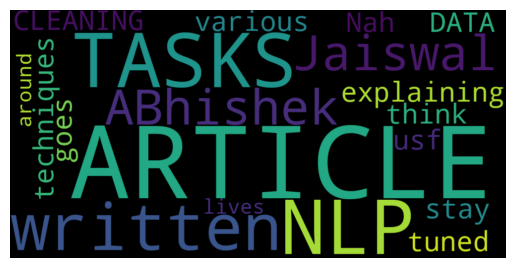

In [27]:
words = []
for message in df['text']:
    words.extend([word for word in message.split() if word not in STOPWORDS])
        
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()